In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#For building ML model
from sklearn.model_selection import train_test_split

#Different Regressors for ML model
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel , RBF
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#For model evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
df_pollutants = pd.read_csv('merge10_df.csv')
df_pollutants


,Unnamed: 0,state_code,county_code,site_num,date_local,AQI,NO2,ozone,SO2,CO,PM,wind,temp,press,RH,state_name,county_name,city_name,region_name
0,1,1,73,23,2022-01-01,1,1.308333,0.024765,-0.191667,0.100000,14,21.525000,73.083333,988.595833,56.191666,Alabama,Jefferson,Birmingham,South_East
1,2,1,73,23,2022-01-02,4,1.954167,0.017824,-0.237500,0.145833,7,11.359091,55.141667,991.304167,56.191666,Alabama,Jefferson,Birmingham,South_East
2,3,1,73,23,2022-01-03,2,1.530000,0.031882,-0.380000,0.200000,18,49.100000,31.560000,1002.450000,56.191666,Alabama,Jefferson,Birmingham,South_East
3,4,1,73,23,2022-01-04,8,5.455556,0.025353,0.555556,0.211111,18,12.266667,47.493333,1001.420000,56.191666,Alabama,Jefferson,Birmingham,South_East
4,5,1,73,23,2022-01-05,27,16.493750,0.012563,0.550000,0.406667,21,5.995833,47.887500,996.404167,56.191666,Alabama,Jefferson,Birmingham,South_East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157739,157740,72,25,7,2022-09-14,5,3.466667,0.031882,0.345833,0.612500,18,3.729167,60.333333,985.579167,56.191666,Puerto Rico,Caguas,Caguas,NaN
157740,157741,72,25,7,2022-09-15,6,4.012500,0.031882,0.345833,0.600000,18,3.729167,60.333333,985.579167,56.191666,Puerto Rico,Caguas,Caguas,NaN
157741,157742,72,25,7,2022-09-16,8,4.575000,0.031882,0.345833,0.704167,18,3.729167,60.333333,985.579167,56.191666,Puerto Rico,Caguas,Caguas,NaN
157742,157743,72,25,7,2022-09-17,5,3.225000,0.031882,0.345833,0.458333,18,3.729167,60.333333,985.579167,56.191666,Puerto Rico,Caguas,Caguas,NaN


In [19]:
y = df_pollutants['AQI']
columns_to_select = ['NO2', 'ozone', 'SO2', 'CO', 'PM', 'wind', 'temp', 'RH']
x = df_pollutants[columns_to_select]

#Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((126195, 8), (31549, 8), (126195,), (31549,))

In [21]:
def model_assess(X_train, X_test, y_train, y_test, model, title = alg):
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred) 
    
    r_squared = r2_score(y_test_pred,y_test)    
    accuracy = round(r_squared*100,2)
    
    result = [str(title),test_mse, test_r2,r_squared,accuracy]
    
    return result

In [22]:
algs = [LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(), 
          DecisionTreeRegressor(max_features = 'auto', max_depth=3, random_state=42),
          GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)]



In [23]:
results_list=[]
for alg in algs:    
   results_list.append(model_assess(X_train, X_test, y_train, y_test, alg, title = alg) )

regression_results_df=pd.DataFrame(results_list, columns=['Algorithm','Test MSE','Test R2','R Squared','Accuracy'])
regression_results_df

,Algorithm,Test MSE,Test R2,R Squared,Accuracy
0,LinearRegression(),23.157948,0.826961,0.793633,79.36
1,KNeighborsRegressor(),21.482055,0.839484,0.815963,81.60
2,RandomForestRegressor(),17.495683,0.869270,0.854120,85.41
3,"DecisionTreeRegressor(max_depth=3, max_feature...",22.332338,0.833130,0.802207,80.22
4,GradientBoostingRegressor(random_state=42),17.199274,0.871485,0.851299,85.13


# Feature Selection Using Pearson Correlation

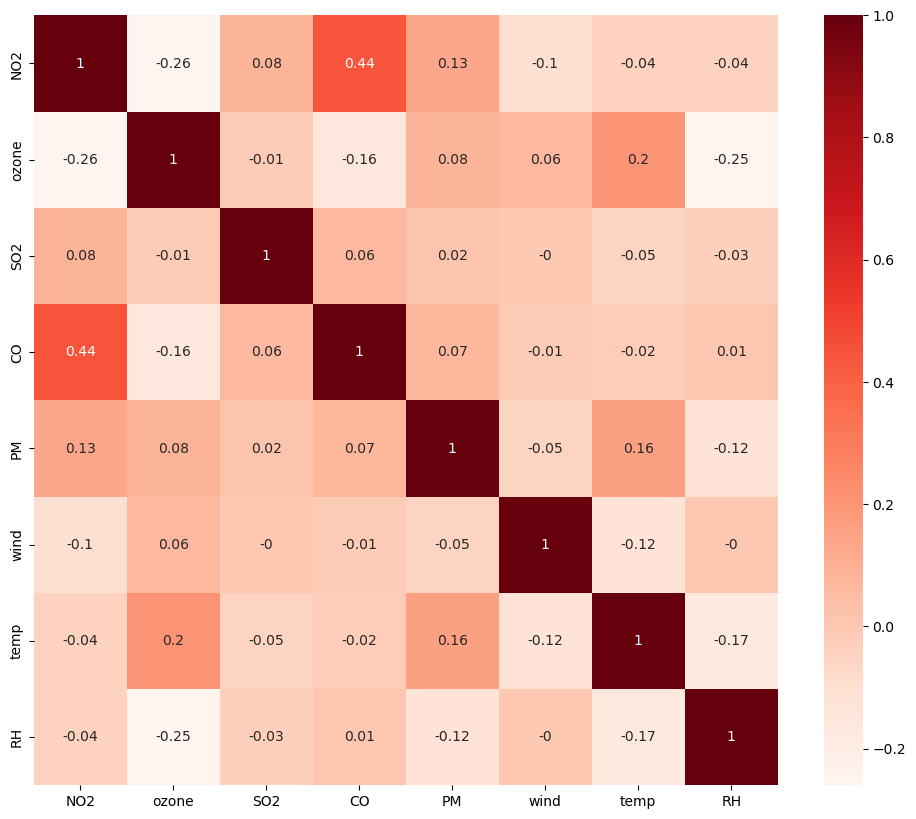

In [24]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr_cols=['NO2', 'ozone', 'SO2', 'CO', 'PM', 'wind', 'temp', 'RH']
# Creating a correlation matrix 
corr_matrix = df_pollutants[corr_cols].corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()




In [25]:
#Correlation with output variable
cor_target = abs(cor["AQI"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

AQI    1.000000
NO2    0.906262
CO     0.355695
Name: AQI, dtype: float64

In [26]:
# The features NO2,CO are highly correlated with the output variable AQI,Hence we will drop all other features apart from these

y = df_pollutants['AQI']
columns_to_select = ['NO2', 'CO']
x = df_pollutants[columns_to_select]

#Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((126195, 2), (31549, 2), (126195,), (31549,))

In [27]:
reg_results_list1=[]
for model in algs:    
   reg_results_list1.append(model_assess(X_train, X_test, y_train, y_test, model, title = model) )  


In [28]:
df_reg=pd.DataFrame(reg_results_list1, columns=['Algorithm','Test MSE','Test R2','R Squared','Accuracy'])
df_reg

,Algorithm,Test MSE,Test R2,R Squared,Accuracy
0,LinearRegression(),23.928997,0.821200,0.785549,78.55
1,KNeighborsRegressor(),22.712246,0.830292,0.811406,81.14
2,RandomForestRegressor(),22.553908,0.831475,0.813680,81.37
3,"DecisionTreeRegressor(max_depth=3, max_feature...",22.332338,0.833130,0.802207,80.22
4,GradientBoostingRegressor(random_state=42),18.987270,0.858125,0.835796,83.58


# Feature Reduction by PCA

In [36]:
columns_to_select = ['NO2', 'ozone', 'SO2', 'CO', 'PM', 'wind', 'temp', 'RH']
x = df_pollutants[columns_to_select]

In [37]:
#Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((126195, 8), (31549, 8), (126195,), (31549,))

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize feature matrix
scaler_pca = StandardScaler() 

 # Standardize the feature matrix
features = scaler_pca.fit_transform(X_train)

# Create a PCA that will retain 80 of variance
pca = PCA(n_components=0.80, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])


Original number of features: 8
Reduced number of features: 6


In [39]:
#Transform but DO NOT fit the test features with the same PCA.

# Standardize the feature matrix
features_test = scaler_pca.transform(X_test)

# Conduct PCA
features_pca_test = pca.transform(features_test)

# Show results
print("Original number of features:", features_test.shape[1])
print("Reduced number of features:", features_pca_test.shape[1])
X_test.shape[1]

Original number of features: 8
Reduced number of features: 6


8

In [47]:
# Create linear regression object
reg_pca = linear_model.LinearRegression()
reg_pca.fit(features_pca,y_train)

# Predicting the output

y_pred_pca = reg_pca.predict(features_pca_test)
y_pred_pca.shape


(31549,)

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Mean Squared Error
mse = mean_squared_error(y_pred_pca,y_test)
# Root Mean Squared Error
rmse = np.sqrt(mse)
# Mean Absolute error
mae = mean_absolute_error(y_pred_pca,y_test)
# R2
r_squared = r2_score(y_pred_pca,y_test)
r_squared
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Accuracy",round(r_squared*100,2))

Mean Squared Error: 67.58882611476996
Root Mean Squared Error: 8.221242370516148
R-squared: 0.2458928916249854
Accuracy 24.59


In [49]:
def model_assess_pca(features_pca, features_pca_test, y_train, y_test, model, title = model):
    
    model.fit(features_pca, y_train)    
    y_test_pred_pca = model.predict(features_pca_test)    
    
    test_mse = mean_squared_error(y_test, y_test_pred_pca)
    test_r2 = r2_score(y_test, y_test_pred_pca)
    
       
    r_squared = r2_score(y_test_pred_pca,y_test)    
    accuracy = round(r_squared*100,2)
    
    result = [str(title),test_mse, test_r2,r_squared,accuracy]
    
    
    return result

In [51]:
results_list_pca=[]
for model in algs:    
   results_list_pca.append(model_assess_pca(features_pca, features_pca_test, y_train, y_test, model, title = model) )  

In [53]:
# Create DataFrame
columns = ['Algorithm', 'Test MSE', 'Test R2', 'R Squared', 'Accuracy']
df_regression = pd.DataFrame(results_list_pca, columns=columns)
df_regression

,Algorithm,Test MSE,Test R2,R Squared,Accuracy
0,LinearRegression(),67.588826,0.494969,0.245893,24.59
1,KNeighborsRegressor(),27.963677,0.791052,0.750881,75.09
2,RandomForestRegressor(),26.498665,0.801999,0.753208,75.32
3,"DecisionTreeRegressor(max_depth=3, max_feature...",61.658604,0.539280,0.147110,14.71
4,GradientBoostingRegressor(random_state=42),38.324697,0.713634,0.568430,56.84


In [ ]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint


# Define the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': [0.5, 0.7, 0.9, 1.0]
}
print("1")
# Define RandomizedSearchCV with the chosen hyperparameter grid and number of iterations
random_search = RandomizedSearchCV(estimator=gb_regressor, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
print("2")
# Perform the hyperparameter search using the training data
random_search.fit(X_train, y_train)
print("3")
# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)
print("4")
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)


1
2
